# Video Game Sales
A simple analysis to check if critic scores correlates with sales based on the given dataset.
### About Dataset
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include:
- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.
- Critic_score - Aggregate score compiled by Metacritic staff
- Critic_count - The number of critics used in coming up with the Critic_score
- User_score - Score by Metacritic's subscribers
- User_count - Number of users who gave the user_score
- Developer - Party responsible for creating the game
- Rating - The ESRB ratings

Data gathered is from video game sales from 1980 - 2017

In [162]:
# Reading from CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
print(df.shape)
df

(16719, 16)


Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0              76.0          51.0          8       322.0  Nintendo      E  
1               NaN           NaN        NaN         NaN       NaN    NaN  
2              82.0          73.0        8.3       709.0  Nintendo      E  
3              80.0          73.0          8       192.0  Nintendo      E  
4               NaN           NaN        NaN         NaN       NaN    NaN  
...             ...           ...        ...         ...       ...    ...  
16714           NaN           NaN        NaN         NaN       NaN    NaN  
16715           NaN           NaN        NaN         NaN       NaN    NaN  
16716           NaN           NaN        NaN         NaN       NaN    NaN  
16717           NaN           NaN        NaN         NaN       NaN    NaN  
16718           NaN           NaN        NaN         NaN       NaN    NaN  

[16719 rows x 16 columns]

Our data has 16,719 rows / Video Game that has 16 columns listed above

Next is to clean the data, check for duplicates, and execute feasible imputations for null values.

In [163]:
# Check Duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating]
Index: []

In [164]:
# Check null/NaN values 
df[df.isna().any(axis=1)]

Name Platform  Year_of_Release         Genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
5          Nintendo     23.20      2.26      4.22         0.58         30.26   
9          Nintendo     26.93      0.63      0.28         0.47         28.31   
10         Nintendo      9.05     10.95      1.93         2.74         24.67   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
1               NaN           NaN        NaN         NaN       NaN    NaN  
4               NaN           NaN        NaN         NaN       NaN    NaN  
5               NaN           NaN        NaN         NaN       NaN    NaN  
9               NaN           NaN        NaN         NaN       NaN    NaN  
10              NaN           NaN        NaN         NaN       NaN    NaN  
...             ...           ...        ...         ...       ...    ...  
16714           NaN           NaN        NaN         NaN       NaN    NaN  
16715           NaN           NaN        NaN         NaN       NaN    NaN  
16716           NaN           NaN        NaN         NaN       NaN    NaN  
16717           NaN           NaN        NaN         NaN       NaN    NaN  
16718           NaN           NaN        NaN         NaN       NaN    NaN  

[9894 rows x 16 columns]

Cleaning the data by imputing "Unknown" and 0 to string and numeric columns respectively, also, we have "tbd" values in column "User_Score". We assumed that this has ongoing review while the data has been scraped. I think it is safe to impute "tbd" values to 0.



In [165]:
imputed_df = df.copy()

# Checks per column if string or numeric then imputes data to "Unknown" and 0 respectively
for index in imputed_df:
    if is_string_dtype(df[index]) and index != 'Critic_Score' and index != 'User_Score':
        imputed_df[index].fillna("Unknown", inplace=True)
    elif is_numeric_dtype(df[index]) and index != 'Year_of_Release' and index == 'User_Score':
        imputed_df[index].fillna(0, inplace=True)
imputed_df

#change tbd from User_Score to 0
imputed_df.loc[(imputed_df["User_Score"] == "tbd"), 'User_Score']=0

# imputed_df['Year_of_Release'] = imputed_df['Year_of_Release'].astype(int)
# imputed_df['Critic_Count'] = imputed_df['Critic_Count'].astype(int)
# imputed_df['User_Count'] = imputed_df['User_Count'].astype(int)
imputed_df['User_Score'] = imputed_df['User_Score'].astype(float)

imputed_df[imputed_df.isna().any(axis=1)]

Name Platform  Year_of_Release         Genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
5          Nintendo     23.20      2.26      4.22         0.58         30.26   
9          Nintendo     26.93      0.63      0.28         0.47         28.31   
10         Nintendo      9.05     10.95      1.93         2.74         24.67   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count  User_Score  User_Count Developer   Rating  
1               NaN           NaN         NaN         NaN   Unknown  Unknown  
4               NaN           NaN         NaN         NaN   Unknown  Unknown  
5               NaN           NaN         NaN         NaN   Unknown  Unknown  
9               NaN           NaN         NaN         NaN   Unknown  Unknown  
10              NaN           NaN         NaN         NaN   Unknown  Unknown  
...             ...           ...         ...         ...       ...      ...  
16714           NaN           NaN         NaN         NaN   Unknown  Unknown  
16715           NaN           NaN         NaN         NaN   Unknown  Unknown  
16716           NaN           NaN         NaN         NaN   Unknown  Unknown  
16717           NaN           NaN         NaN         NaN   Unknown  Unknown  
16718           NaN           NaN         NaN         NaN   Unknown  Unknown  

[9825 rows x 16 columns]

In [166]:
# # Check per column if there is null

# # Check null values of string columns

# imputed_df = df.copy()
# imputed_df[imputed_df['Name'].isnull()]
# # Impute NaN to 'Unknown'
# imputed_df['Name'].fillna("Unknown", inplace=True)
# imputed_df['Developer'].fillna("Unknown", inplace=True)
# imputed_df['Rating'].fillna("Unknown", inplace=True)
# imputed_df['Publisher'].fillna("Unknown", inplace=True)
# imputed_df['Genre'].fillna("Unknown", inplace=True)

# # Check null values in Platform column
# imputed_df[imputed_df['Platform'].isnull()]

# # Check null values in Year_of_Release column
# imputed_df[imputed_df['Year_of_Release'].isnull()]
# # Impute NaN year to 0 for better visualization
# imputed_df['Year_of_Release'].fillna(0, inplace=True)
# imputed_df['Year_of_Release'] = imputed_df['Year_of_Release'].astype(int)
# imputed_df[imputed_df['Year_of_Release'].isnull()]

# # Check null values in Critic_Count column
# imputed_df[imputed_df['Critic_Count'].isnull()]
# # imputed_df['Critic_Count'] = imputed_df['Critic_Count'].astype(float)
# imputed_df['Critic_Count'].fillna(0, inplace=True)
# imputed_df['Critic_Score'].fillna(0, inplace=True)
# imputed_df['User_Count'].fillna(0, inplace=True)
# imputed_df['User_Score'].fillna(0, inplace=True)
# imputed_df[imputed_df.isna().any(axis=1)]

### Cleaned Data Frame
- Decided to impute NaN values to "Unknown" if string and 0 if numeric

In [199]:
imputed_df.head(20)


Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS           2005.0   
12                   Pokemon Gold/Pokemon Silver       GB           1999.0   
13                                       Wii Fit      Wii           2007.0   
14                            Kinect Adventures!     X360           2010.0   
15                                  Wii Fit Plus      Wii           2009.0   
16                            Grand Theft Auto V      PS3           2013.0   
17                 Grand Theft Auto: San Andreas      PS2           2004.0   
18                             Super Mario World     SNES           1990.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   

           Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Sports                Nintendo     41.36     28.96      3.77   
1       Platform                Nintendo     29.08      3.58      6.81   
2         Racing                Nintendo     15.68     12.76      3.79   
3         Sports                Nintendo     15.61     10.93      3.28   
4   Role-Playing                Nintendo     11.27      8.89     10.22   
5         Puzzle                Nintendo     23.20      2.26      4.22   
6       Platform                Nintendo     11.28      9.14      6.50   
7           Misc                Nintendo     13.96      9.18      2.93   
8       Platform                Nintendo     14.44      6.94      4.70   
9        Shooter                Nintendo     26.93      0.63      0.28   
10    Simulation                Nintendo      9.05     10.95      1.93   
11        Racing                Nintendo      9.71      7.47      4.13   
12  Role-Playing                Nintendo      9.00      6.18      7.20   
13        Sports                Nintendo      8.92      8.03      3.60   
14          Misc  Microsoft Game Studios     15.00      4.89      0.24   
15        Sports                Nintendo      9.01      8.49      2.53   
16        Action    Take-Two Interactive      7.02      9.09      0.98   
17        Action    Take-Two Interactive      9.43      0.40      0.41   
18      Platform                Nintendo     12.78      3.75      3.54   
19          Misc                Nintendo      4.74      9.20      4.16   

    Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
0          8.45         82.53          76.0          51.0         8.0   
1          0.77         40.24           NaN           NaN         NaN   
2          3.29         35.52          82.0          73.0         8.3   
3          2.95         32.77          80.0          73.0         8.0   
4          1.00         31.37           NaN           NaN         NaN   
5          0.58         30.26           NaN           NaN         NaN   
6          2.88         29.80          89.0          65.0         8.5   
7          2.84         28.92          58.0          41.0         6.6   
8          2.24         28.32          87.0          80.0         8.4   
9          0.47         28.31           NaN           NaN         NaN   
10         2.74         24.67           NaN    

In [172]:
imputed_df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Score  \
count  16719.000000  16719.000000   8137.000000   8137.000000  10015.000000   
mean       0.047332      0.533543     68.967679     26.360821      5.399810   
std        0.186710      1.547935     13.938165     18.980495      3.319944   
min        0.000000      0.010000     13.000000      3.000000      0.000000   
25%        0.000000      0.060000     60.000000     12.000000      2.400000   
50%        0.010000      0.170000     71.000000     21.000000      6.900000   
75%        0.030000      0.470000     79.000000     36.000000      8.000000   
max       10.570000     82.530000     98.000000    113.000000      9.700000   

         User_Count  
count   7590.000000  
mean     162.229908  
std      561.282326  
min        4.000000  
25%       10.000000  
50%       24.000000  
75%       81.000000  
max    10665.000000

In [168]:
# TODO: create visualization, how many releases per year, maybe graph per genre? 

### Top 20 Video Game Sales 
Here we can see that Wii Sports has the most sales in Millions. Mostly from North America, followed by Europe, Japan and other countries.

Also the data Global sales consists of Europe Sales, Japan Sales, North America Sales and Other Region Sales

Text(0, 0.5, 'Sales in Millions')

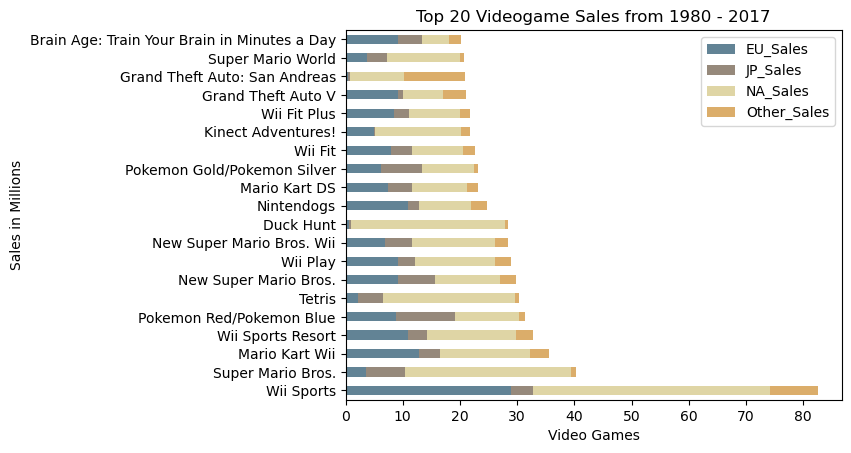

In [207]:
# Top 20 games of 1980 - 2017 based on copies sold
top_20_games = imputed_df.sort_values(['Global_Sales'], ascending=False).head(20)
top_20_games_pivot = top_20_games[['Name','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
top_20_games_pivot = pd.pivot_table(data=top_20_games_pivot, index=['Name'])
top_20_games_pivot.sort_values(['Global_Sales'], ascending=False, inplace=True)
top_20_games_pivot.drop('Global_Sales', inplace=True, axis=1)
top_20_games_pivot.plot.barh(stacked=True, color=['#628395', '#96897B', "#DFD5A5", '#DBAD6A'], alpha=1)
plt.title("Top 20 Videogame Sales from 1980 - 2017")
plt.xlabel("Video Games")
plt.ylabel("Sales in Millions")

### Top 20 Publisher Sales
In this graph, we can see that Nintendo has the most sales. Also, if you have noticed, the top 4 on Global Sales are published by Nintendo.


Text(0, 0.5, 'Sales in Millions')

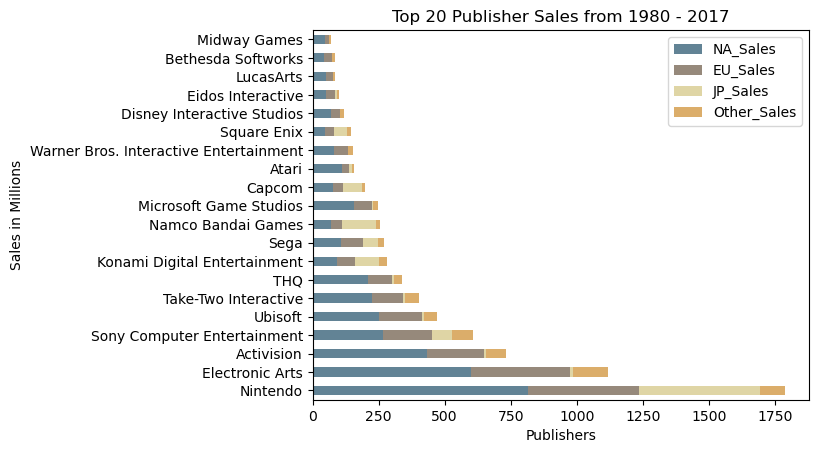

In [206]:
# Which publishers sold the most from 1980 - 2017
top_20_pubs = imputed_df[['Publisher','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
top_20_pubs = top_20_pubs.groupby(by='Publisher').sum().sort_values('Global_Sales', ascending=False).head(20)
top_20_pubs.drop('Global_Sales', inplace=True, axis=1)
top_20_pubs

top_20_pubs.plot.barh(stacked=True, color=['#628395', '#96897B', "#DFD5A5", '#DBAD6A'], alpha=1)
plt.title("Top 20 Publisher Sales from 1980 - 2017")
plt.xlabel("Publishers")
plt.ylabel("Sales in Millions")

### Sales By Genre
Below is the wholistic view of Sales by Genre.

In [205]:
# Genres overall

genres = imputed_df[['Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
genres = genres.groupby('Genre').sum().sort_values('Global_Sales', ascending=False)
genres.drop('Global_Sales', inplace=True, axis=1)
genres.plot.barh(stacked=True, color=['#628395', '#96897B', "#DFD5A5", '#DBAD6A'], alpha=1)
plt.title("Sales per Genre from 1980 - 2017")
plt.ylabel("Sales in Millions")

Text(0, 0.5, 'Sales in Millions')

### Sales By Platform
Below is the wholistic view of Sales by Platform.

Text(0, 0.5, 'Sales in Millions')

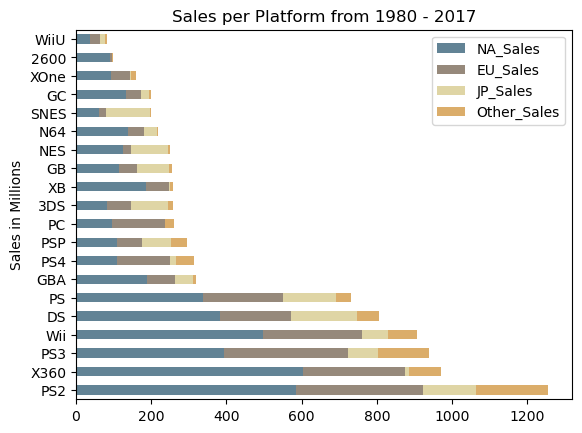

In [204]:
#top 20 gaming platforms based on videogame sales
top_20_platforms = imputed_df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
top_20_platforms = top_20_platforms.groupby('Platform').sum().sort_values('Global_Sales',ascending=False).head(20)
top_20_platforms.drop('Global_Sales', inplace=True, axis=1)
top_20_platforms.plot.barh(stacked=True, color=['#628395', '#96897B', "#DFD5A5", '#DBAD6A'])
plt.title("Sales per Platform from 1980 - 2017")
plt.ylabel("Sales in Millions")
# top_20_platforms

### Number of Released Games per Year 
Below is the a line graph showing number of released games per year. We can see that up until around 1995, released games were only below 200 yearly.

And the peak are on 2008-2009.

We can also see that we have a released game in 2020. We can assume that 2020 game has an early "Beta" version.

<AxesSubplot: xlabel='Year_of_Release'>

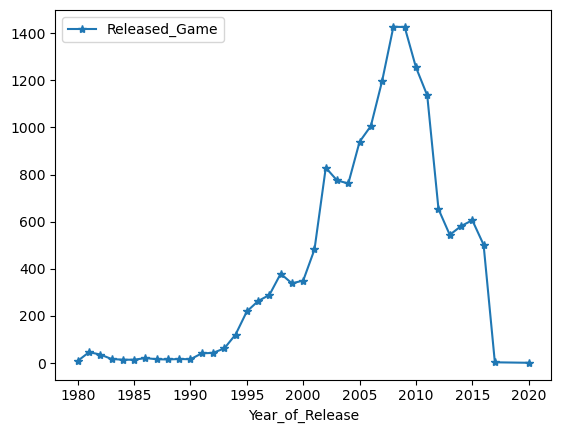

In [212]:
# Games published per year
pubs_per_year = imputed_df[['Year_of_Release', 'Name']].copy()
pubs_per_year.rename(columns={"Name": "Released_Game"}, inplace=True)
pubs_per_year = pubs_per_year.groupby('Year_of_Release').count().sort_values('Year_of_Release')
pubs_per_year.plot(marker='*')

### Games Ranking
Games Rankingby Metacritic (User_Score) users and Aggregated scores by Metacritic Staffs from other sources (Critic_Score)

Below are some findings about the Data:
- Top 3 from both sources were not the same/correlated
- Ranking from Critic_Score is 0-100, whilst 0-10 in User_Score
- Top 5 from Sales were not in the top 5 of the ranking by users/critics

<AxesSubplot: ylabel='Name'>

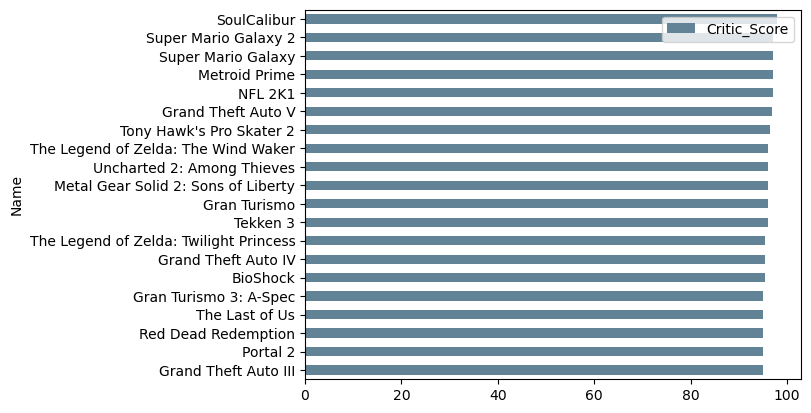

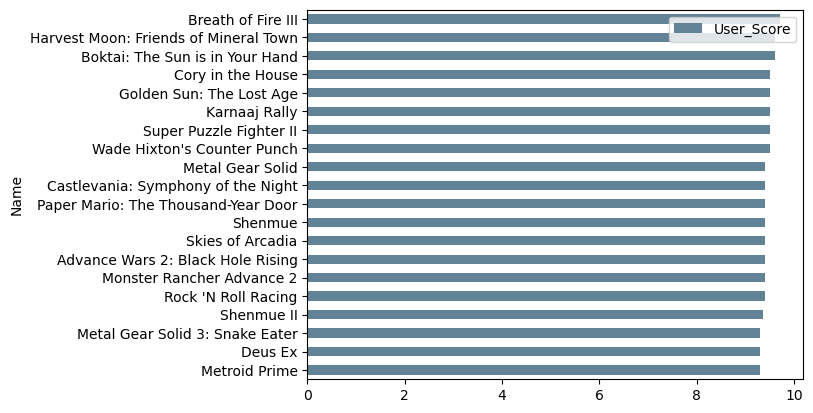

In [200]:
top_20_crit_rated_games = imputed_df[['Name', 'Critic_Score', 'Critic_Count']].copy()
top_20_crit_rated_games = top_20_crit_rated_games.groupby('Name').mean().sort_values(['Critic_Score', 'Critic_Count'], ascending=False).head(20)
top_20_crit_rated_games.drop('Critic_Count', inplace=True, axis=1)
top_20_crit_rated_games.sort_values('Critic_Score', inplace=True)
top_20_crit_rated_games.plot.barh(color='#628395')
top_20_crit_rated_games

top_20_user_rated_games = imputed_df[['Name', 'User_Score', 'User_Count']].copy()
top_20_user_rated_games = top_20_user_rated_games.groupby('Name').mean().sort_values(['User_Score', 'User_Count'], ascending=False).head(20)
top_20_user_rated_games.drop('User_Count', inplace=True, axis=1)
top_20_user_rated_games.sort_values('User_Score', inplace=True)
top_20_user_rated_games.plot.barh(color='#628395')


### Correlation Heatmap
This heatmap only shows the numeric values from the data.

We can see that either Critic and User Scores were not highly correlated with any sales (Global, JP, EU, NA, and others).

As per data above and the heatmap below. We can assume that Reviews are not correlated with Sales. But why? Let's see below

C:\Users\kenuc\AppData\Local\Temp\ipykernel_8764\162274159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_heatmap = sns.heatmap(imputed_df.corr())


Text(0.5, 1.0, 'Correlation Heatmap')

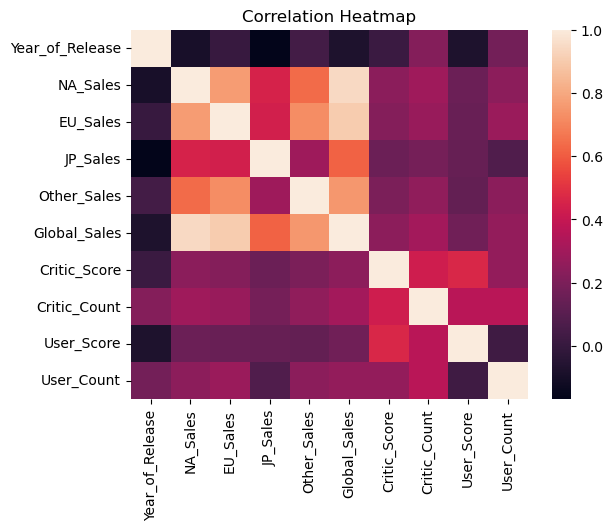

In [175]:
corr_heatmap = sns.heatmap(imputed_df.corr())
corr_heatmap.set_title("Correlation Heatmap")

Here, we used pd.factorized to include categorical data. It assigns specific numeric values to any data in the data frame so that we can get the correlation even amongst the categorical data.

As we can see, Critic and User Scores have still a low correlation with Global Sales.

Text(0.5, 1.0, 'Correlation Heatmap')

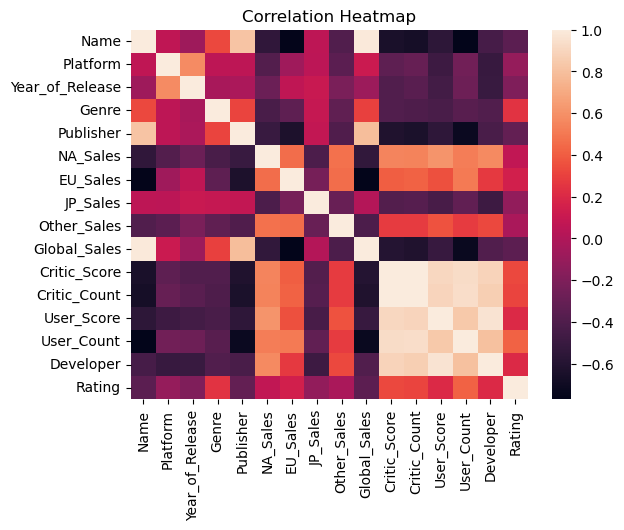

In [176]:
factorized_imputed_df = imputed_df.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1)
corr_heatmap = sns.heatmap(factorized_imputed_df.corr())
corr_heatmap.set_title("Correlation Heatmap")

### An educated guess
Maybe one of the reasons is when the reviewing started. 

We can see below that reviews only started around 2000s. Maybe this is one of the reasons that if we include sales data from the beginning, we won't see any correlation between the target analysis


Year_of_Release
1980.0       0
1981.0       0
1982.0       0
1983.0       0
1984.0       0
1985.0       1
1986.0       0
1987.0       0
1988.0       1
1989.0       0
1990.0       0
1991.0       0
1992.0       1
1993.0       0
1994.0       1
1995.0       0
1996.0       8
1997.0      19
1998.0      31
1999.0      39
2000.0     150
2001.0     339
2002.0     656
2003.0     611
2004.0     596
2005.0     704
2006.0     676
2007.0     821
2008.0     987
2009.0    1019
2010.0     798
2011.0     718
2012.0     363
2013.0     319
2014.0     350
2015.0     335
2016.0     296
2017.0       0
2020.0       1
Name: User_Score, dtype: int64

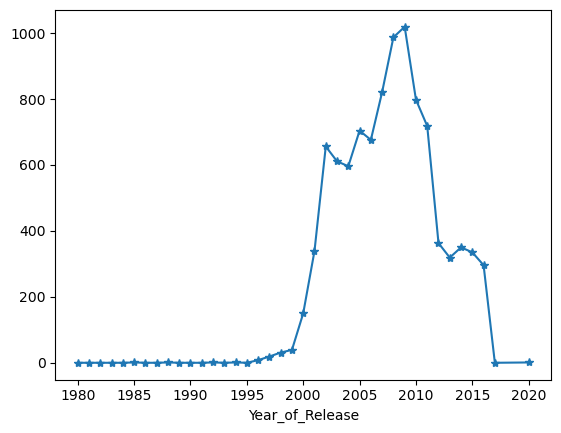

In [230]:
user_review_year = imputed_df['User_Score'].groupby(imputed_df["Year_of_Release"]).count()
user_review_year.plot(marker="*")
user_review_year

Year_of_Release
1980.0      0
1981.0      0
1982.0      0
1983.0      0
1984.0      0
1985.0      1
1986.0      0
1987.0      0
1988.0      1
1989.0      0
1990.0      0
1991.0      0
1992.0      1
1993.0      0
1994.0      1
1995.0      0
1996.0      8
1997.0     17
1998.0     28
1999.0     39
2000.0    143
2001.0    326
2002.0    627
2003.0    585
2004.0    561
2005.0    655
2006.0    620
2007.0    692
2008.0    715
2009.0    651
2010.0    500
2011.0    500
2012.0    321
2013.0    273
2014.0    261
2015.0    225
2016.0    232
2017.0      0
2020.0      0
Name: Critic_Score, dtype: int64

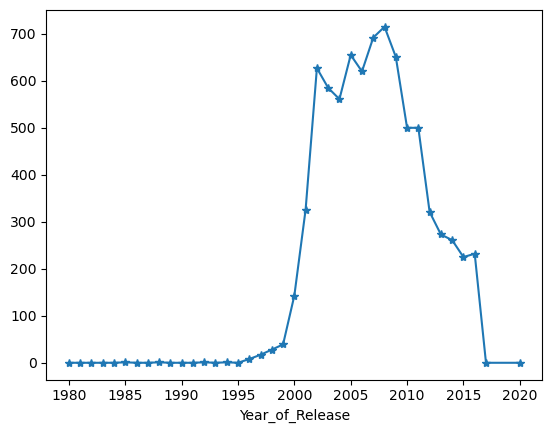

In [231]:
critic_review_year = imputed_df['Critic_Score'].groupby(imputed_df["Year_of_Release"]).count()
critic_review_year.plot(marker="*")
critic_review_year